# Quickstart

In [2]:
%load_ext autoreload
%autoreload 2

import pens

## Load data from a `pandas.DataFrame`

In [15]:
# create test data in the form of a pandas.DataFrame
import pandas as pd
import numpy as np

df = pd.DataFrame()
df['Year'] = np.arange(1601, 1605)
df['ens.0'] = np.random.rand(len(df['Year']))
df['ens.1'] = np.random.rand(len(df['Year']))
df['ens.2'] = np.random.rand(len(df['Year']))
df

,Year,ens.0,ens.1,ens.2
0,1601,0.000898,0.036686,0.127020
1,1602,0.795503,0.599207,0.192624
2,1603,0.237588,0.608029,0.979116
3,1604,0.072856,0.020235,0.386887


In [52]:
# create an EnsembleTS from a pandas.DataFrame
ens_full = pens.EnsembleTS().from_df(df, time_column='Year')

# convert back to a pandas.DataFrame
df_out_full = ens_full.to_df(time_column='Year')
df_out_full

,Year,ens.0,ens.1,ens.2
0,1601,0.000898,0.036686,0.127020
1,1602,0.795503,0.599207,0.192624
2,1603,0.237588,0.608029,0.979116
3,1604,0.072856,0.020235,0.386887


In [55]:
# create an EnsembleTS from a pandas.DataFrame with value columns specified
ens_sub = pens.EnsembleTS().from_df(df, time_column='Year', value_columns=['ens.1', 'ens.2'])

# convert back to a pandas.DataFrame
df_out_sub = ens_sub.to_df(time_column='Year')
df_out_sub

,Year,ens.0,ens.1
0,1601,0.036686,0.127020
1,1602,0.599207,0.192624
2,1603,0.608029,0.979116
3,1604,0.020235,0.386887


## Load data from a .nc file

In [2]:
# the data can be downloaded from:
# https://atmos.washington.edu/%7Ehakim/lmr/LMRv2/gmt_MCruns_ensemble_full_LMRv2.1.nc
path = './data/gmt_MCruns_ensemble_full_LMRv2.1.nc'
ens_LMR = pens.EnsembleTS().load_nc(path, var='gmt')

In [3]:
print(ens_LMR.value.shape)
print(ens_LMR.nt)
print(ens_LMR.nEns)

(2001, 2000)
2001
2000


## Plot the quantiles of the ensembles

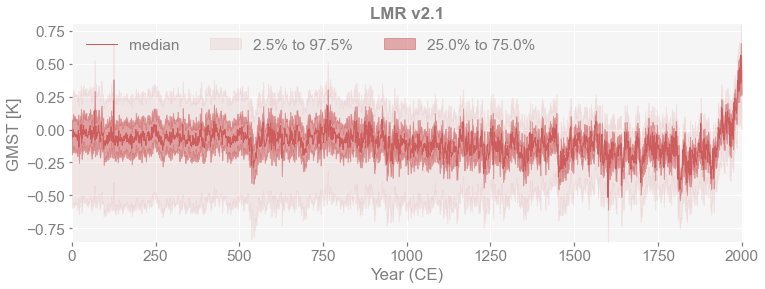

In [5]:
fig, ax = ens_LMR.plot_qs(ylabel='GMST [K]', title='LMR v2.1')

## Plot the ensembles in the form of timeseries 2d histogram

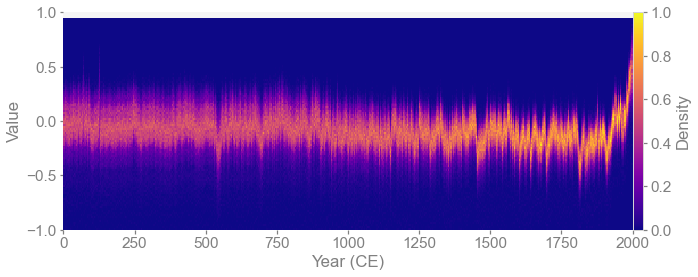

In [6]:
fig, ax = ens_LMR.line_density(ylim=(-1, 1))

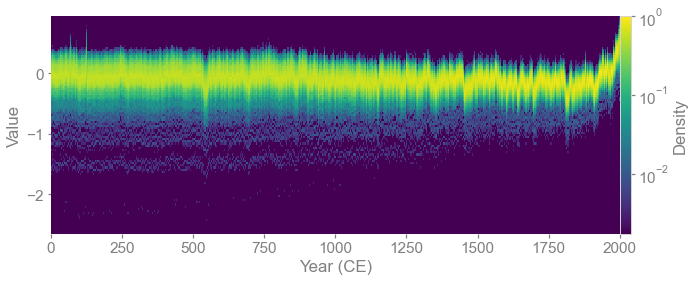

In [7]:
fig, ax = ens_LMR.line_density(color_scale='log', cmap='viridis', bins=[500, 100])


## Get and plot random sample paths from the ensembles

(2001, 1)
(2001, 3)


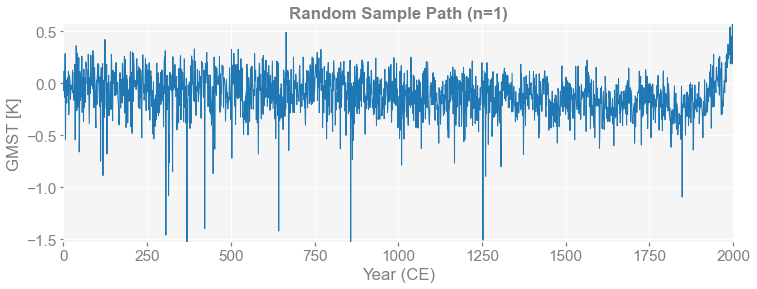

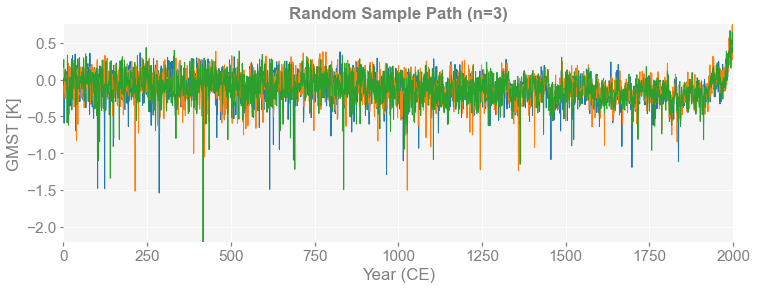

In [8]:
for n in [1, 3]:
    ps = ens_LMR.sample_random(n=n, seed=2333)
    fig, ax = ps.plot(ylabel='GMST [K]', title=f'Random Sample Path (n={n})')
    print(ps.value.shape)

## Compare against another set of ensembles

In [9]:
import pandas as pd
import numpy as np

df = pd.read_table('./data/CPS_new.txt')
df

,Year_CE,GMST_anomaly_wrt_1961_1990_member_1 (°C),GMST_anomaly_wrt_1961_1990_member_2 (°C),GMST_anomaly_wrt_1961_1990_member_3 (°C),GMST_anomaly_wrt_1961_1990_member_4 (°C),GMST_anomaly_wrt_1961_1990_member_5 (°C),GMST_anomaly_wrt_1961_1990_member_6 (°C),GMST_anomaly_wrt_1961_1990_member_7 (°C),GMST_anomaly_wrt_1961_1990_member_8 (°C),GMST_anomaly_wrt_1961_1990_member_9 (°C),...,GMST_anomaly_wrt_1961_1990_member_991 (°C),GMST_anomaly_wrt_1961_1990_member_992 (°C),GMST_anomaly_wrt_1961_1990_member_993 (°C),GMST_anomaly_wrt_1961_1990_member_994 (°C),GMST_anomaly_wrt_1961_1990_member_995 (°C),GMST_anomaly_wrt_1961_1990_member_996 (°C),GMST_anomaly_wrt_1961_1990_member_997 (°C),GMST_anomaly_wrt_1961_1990_member_998 (°C),GMST_anomaly_wrt_1961_1990_member_999 (°C),GMST_anomaly_wrt_1961_1990_member_1000 (°C)
0,1,-0.570,-0.522,-0.220,-0.539,-0.626,-0.386,-0.330,-0.684,-0.370,...,-0.665,-0.168,-0.251,-0.348,-0.205,-0.294,-0.438,-0.374,-0.482,-0.388
1,2,-0.308,-0.056,-0.302,-0.447,-0.435,-0.621,-0.458,-0.513,-0.333,...,-0.241,-0.357,-0.485,-0.300,-0.216,-0.382,-0.394,-0.169,-0.362,-0.109
2,3,-0.529,-0.132,-0.243,-0.133,-0.614,-0.388,-0.516,-0.194,-0.565,...,-0.338,-0.439,-0.286,-0.221,-0.259,-0.517,-0.378,-0.581,-0.146,-0.169
3,4,-0.287,-0.324,-0.268,-0.310,-0.404,-0.374,-0.398,-0.349,-0.468,...,-0.407,-0.287,-0.239,-0.310,-0.278,-0.555,-0.506,-0.523,-0.067,-0.223
4,5,-0.702,-0.640,-0.329,-0.313,-0.505,-0.650,-0.359,-0.526,-0.221,...,-0.404,-0.434,-0.164,-0.166,0.024,-0.602,-0.687,-0.430,-0.146,-0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0.514,0.226,0.136,0.368,0.040,0.338,0.120,0.126,0.232,...,0.137,0.443,0.345,0.339,0.240,0.266,0.391,0.290,0.153,0.331
1996,1997,0.378,-0.022,0.188,0.381,0.107,0.327,0.175,0.313,0.190,...,0.178,0.279,0.260,0.269,0.130,0.216,0.280,0.341,0.168,0.252
1997,1998,0.643,0.214,0.281,0.439,0.259,0.221,0.229,0.267,0.340,...,0.288,0.453,0.615,0.574,0.273,0.678,0.414,0.594,0.201,0.331
1998,1999,0.486,0.155,0.135,0.271,0.194,0.198,0.316,0.104,0.269,...,0.217,0.423,0.340,0.539,0.377,0.324,0.271,0.345,0.063,0.380


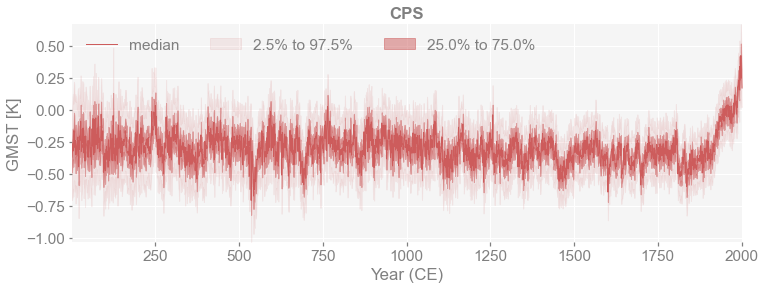

In [10]:
time = np.arange(1, 2001)
value = df.to_numpy()[:, 1:]

ens_CPS = pens.EnsembleTS(time=time, value=value)
fig, ax = ens_CPS.plot_qs(ylabel='GMST [K]', title='CPS')

### Get the nearest sample path against a target series (one ensemble member)

4.191018961831515e-06


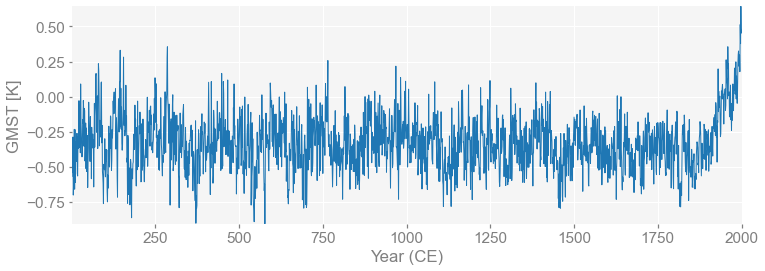

In [11]:
path_nearest = ens_LMR.slice([1, 2000]).sample_nearest(ens_CPS.value[:, 0], metric='MSE')
print(path_nearest.distance)
fig, ax = path_nearest.plot(ylabel='GMST [K]')

### Calculate the distance between two sets of ensembles

In [34]:
# compare against the nearest path from another ensemble
dist = ens_LMR.slice([1, 2000]).compare_nearest(ens_CPS, metric='MSE')
print(np.shape(dist), np.sum(dist))

100%|██████████| 1000/1000 [00:19<00:00, 52.21it/s]

(1000,) 4.941634349344827e-06


100%|██████████| 2000/2000 [00:00<00:00, 15020.18it/s]


(2000,) 30.33471765707322


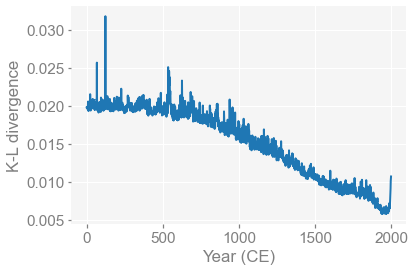

In [41]:
import matplotlib.pyplot as plt
# compare against the distribution at each time point from another ensemble
# note that the ensemble size should be consistent
dist = ens_LMR.slice([1, 2000]).compare(ens_CPS, metric='KLD')
print(np.shape(dist), np.sum(dist))
fig, ax = plt.subplots()
ax.plot(dist)
ax.set_xlabel('Year (CE)')
ax.set_ylabel('K-L divergence')
plt.show()